**Susie Mueller**

Spring 2024

CS 251 / 252: Data Analysis and Visualization

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 14})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 4 | Principal component analysis

Principal component analysis (PCA) is a technique to reduce the dimensionality of a dataset while losing the least amount of information about the data variables. Before implementing PCA and exploring its use with different datasets, you will explore what happens when you manually reduce the dimensionality of a mystery dataset from 3D to 2D.

## AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not the AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

In [8]:
from data_transformations import normalize, center, rotation_matrix_3d
from scatter3d import scatter3dplot

## Task 1: Dimensionality reduction by hand

### 1a. Load and visualize mystery dataset

Load in the mystery dataset (`mystery.csv`) as a pandas DataFrame below. Print out the header and the first five rows of data. You should see:

```
	       x	        y	        z	   color
0	6.183216	86.707892	90.551566	4.810163
1	0.969658	16.972285	137.976605	9.442446
2	0.727076	57.112193	139.795502	9.384942
3	8.433828	30.348513	113.600202	5.973703
4	8.188306	133.978413	120.671505	6.051754
```

**Note:** The `mystery.csv` does not have a types row. Going forward, csv files we work with won't have the types row.

In [9]:
df = pd.read_csv('data/mystery.csv') # load in mystery dataset
print(df.head(5)) # gets first 5 items 

          x           y           z     color
0  6.183216   86.707892   90.551566  4.810163
1  0.969658   16.972285  137.976605  9.442446
2  0.727076   57.112193  139.795502  9.384942
3  8.433828   30.348513  113.600202  5.973703
4  8.188306  133.978413  120.671505  6.051754


Select the x, y, and z variables from the pandas DataFrame and [convert it to a numpy ndarray](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html).

In [10]:
df = df[["x", "y", "z"]] # select x, y, and z variables
data = df.to_numpy()

Use the provided `scatter3dplot` function in `scatter3d.py` to make a 3D scatter plot of the `x`, `y`, and `z` numeric variables. Set the color keyword argument to the `color` variable value from the pandas DataFrame (`len=2000`).

Set the plot bounds (`lims` keyword argument) so that the **entire** dataset appears within the 3D scatter plot. In the provided `scatter3dplot` function, the plot limits that you pass in apply to **all** x, y, and z axes. It may be helpful to print out the min and max of each variable and make sure the bounds that you select encompass all the samples.

Min X:  0.0
Max X:  12.838943842798615
Min Y:  0.0
Max Y:  140.45556082924193
Min Z:  0.0
Max Z:  284.51232384624154


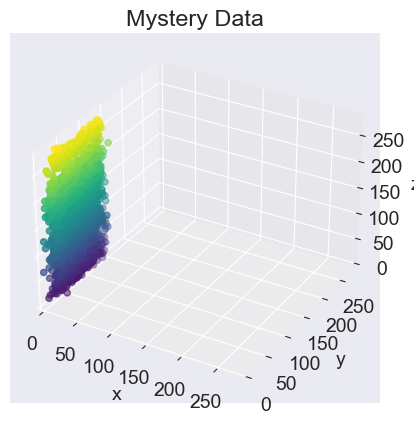

In [11]:
# ensure bounds encompass all samples
min_x = df['x'].min()
print("Min X: ", min_x)
max_x = df['x'].max()
print("Max X: ", max_x)
min_y = df['y'].min()
print("Min Y: ", min_y)
max_y = df['y'].max()
print("Max Y: ", max_y)
min_z = df['z'].min()
print("Min Z: ", min_z)
max_z = df['z'].max()
print("Max Z: ", max_z)

# set plot bounds by getting min and max of all variables
min = np.min(data)
max = np.max(data)
limits = min, max

# plot 3d scatterplot 
scatter3dplot(data, color = data[:, -1], headers = ['x', 'y', 'z'], title = 'Mystery Data', lims=limits) 

### 1b. Preprocess mystery dataset (1/2): Normalize

Implement the `normalize` function in `data_transformations.py` then perform min-max normalization on the `x`, `y`, and `z` values in the mystery dataset.

Use `scatter3dplot` to make a 3D scatterplot of the normalized dataset. Set the color as before, but update the plot limits appropriately based on the new normalized data range.

<!-- In **two lines of code** below, print out the mins and maxes of **each variable** and verify that the data variables are normalized as expected. As above, you should print two length-3 ndarrays — the min and max of each variable (x, y, z) -->

Min X:  0.0
Max X:  1.0
Min Y:  0.0
Max Y:  1.0
Min Z:  0.0
Max Z:  1.0


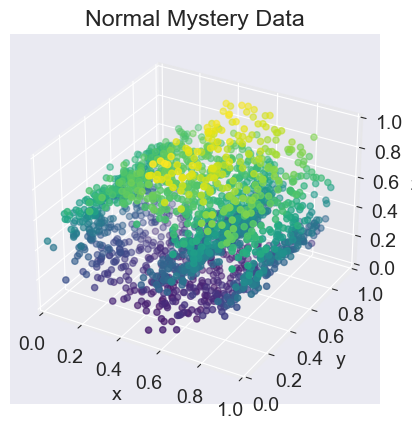

In [12]:
# normalize the mystery dataset
normal = normalize(data)

# calculate min/max for each variable
print("Min X: ", np.min(normal[:,0]))
print("Max X: ", np.max(normal[:,0]))
print("Min Y: ", np.min(normal[:,1]))
print("Max Y: ", np.max(normal[:,1]))
print("Min Z: ", np.min(normal[:,2]))
print("Max Z: ", np.max(normal[:,2]))

# update the plot limits
min = np.min(normal)
# print("Min: ", min)
max = np.max(normal)
# print("Max: ", max)
limits = min, max

# plot
scatter3dplot(normal, color = data[:, -1], headers = ['x', 'y', 'z'], title = 'Normal Mystery Data', lims=limits) 

### 1c. Questions

**Question 1:** What are the min and max values of each variable in the normalized dataset?

**Question 2:** Describe the shape and structure of the normalized mystery dataset. **Why** was the appearance of the dataset not obvious when plotting the raw un-normalized dataset?

**Answer 1:** The minimum for all the variables is 0. The maximum for the x variable is 0.045. The maximum for the y variable is 0.494. The maximum for the z variable is 1.0.

**Answer 2:** The shape of the normalized mystery dataset is a rolled spiral structure. The structure is 3-dimensional, with an "x" axis, "y" axis, and "z" axis. The appearance was initially not obvious because it was not normalized, impacting the perception of the image. 

### 1d. Preprocess mystery dataset (2/2): Center

Implement the `center` function in `data_transformations.py` then center the `x`, `y`, and `z` values in the **normalized** mystery dataset. Then use `scatter3dplot` to make a 3D scatterplot of the normalized and centered dataset. Set the color as before.

Update the plot limits appropriately based on the new expected data range so that all data samples appear in the plot, but minimize "filler space" around the dataset in the plot (*i.e. we want to view the full dataset close-up in detail*).

Min:  -0.501025466599815
Max:  0.5233866277787503

Min X:  -0.501025466599815
Max X:  0.49897453340018505
Min Y:  -0.4928558508047669
Max Y:  0.5071441491952331
Min Z:  -0.47661337222124966
Max Z:  0.5233866277787503


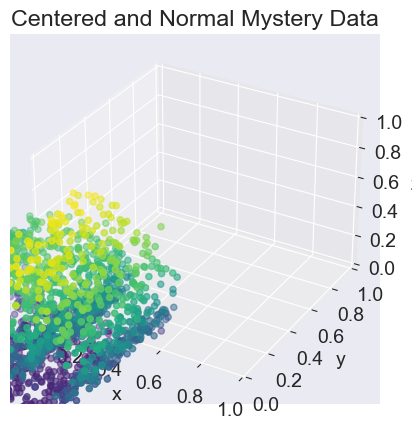

In [14]:
# center the normal data
centered = center(normal)

# set bounds 
min = np.min(centered)
max = np.max(centered)
print("Min: ", min)
print("Max: ", max)

print("\nMin X: ", np.min(centered[:,0]))
print("Max X: ", np.max(centered[:,0]))
print("Min Y: ", np.min(centered[:,1]))
print("Max Y: ", np.max(centered[:,1]))
print("Min Z: ", np.min(centered[:,2]))
print("Max Z: ", np.max(centered[:,2]))

# plot
scatter3dplot(centered, color = data[:, -1], headers = ['x', 'y', 'z'], title = 'Centered and Normal Mystery Data', lims=limits) 

### 1e. Questions

**Question 3:** Verify below that the normalized mystery dataset is now also centered. **Note:** It is totally fine if you have some `-0.` values.

**Question 4:** What are the min and max values of each variable in the normalized and centered dataset? Briefly describe **why** these new min and max values make sense.

**Answer 3:**  It appears that the normalized mystery dataset is now also centered based on the 3-d visualization. In addition, the mins and max of each variable sandwich the number zero. 

**Answer 4:** The minimum of the x variable is -0.02 and its maximum is 0.02. This makes sense because the normalized dataset was initially scaled to (0,1), so it makes sense for the range to be less than 1. The minimum of the y variable is -0.24, and its maximum is 0.25, which makes sense for the same reason. The minimum of the z variable is -0.47, and its maximum is 0.52, which makes sense for the same reason - its range is less than 1. After centering the normalized dataset, the variables should contain zero. 

In [18]:
# Verify centered property
means_aftercentering = np.mean(centered, axis = 0)
print("Means after Centering", means_aftercentering)

# Verify min-maxes
normalized_centered = normalize(centered)
normalized_min = np.min(normalized_centered)
normalized_max = np.max(normalized_centered)
print("Min after normalization: ", normalized_min)
print("Max after normalization: ", normalized_max)

means after centering:  [0. 0. 0.]
Min after normalization:  0.0
Max after normalization:  1.0


### 1f. Projecting mystery dataset from 3D to 2D (1/2)

In the cell below, create a 2D scatter plot showing just the `x` and `y` variables in the normalized and centered mystery dataset.

Text(0.5, 1.0, '2D Mystery Dataset')

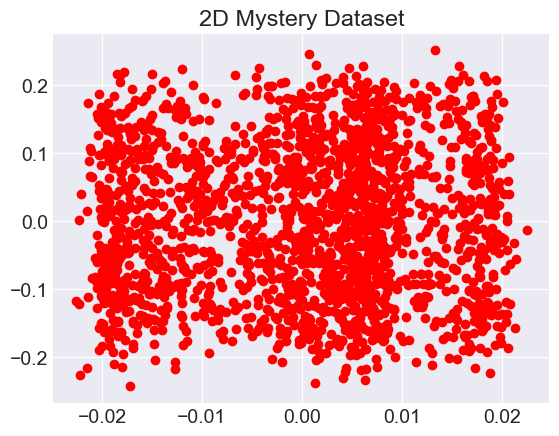

In [12]:
x = centered[:,0]
y = centered[:,1]
plt.scatter(x, y, c = 'red')
plt.title("2D Mystery Dataset")

### 1g. Questions

**Question 5:** Based on your 2D scatter plot, does the projection that you performed in Task 1f look like a "helpful" lower dimensional representation of the dataset? **Why?**


**Answer 5:** No, I do not think the visualization is a helpful lower dimensional representation of the dataset because the z varaible contains critical information, holding greater variance than the x variable. I would suggest using the y and z variables for a better 2D representation of the dataset. 

### 1h. Implement `rotation_matrix_3d`

In `data_transformations.py` implement `rotation_matrix_3d` then test it below.

#### Test `rotation_matrix_3d`

In [13]:
# Test rotate about x axis
print('Your 3D Rotation matrix about x axis by +30° is:')
print(rotation_matrix_3d(30, axis='x'))
print('and should be:')
print('''[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]''')

# Test rotate about y axis
print('Your 3D Rotation matrix about y axis by -15° is:')
print(rotation_matrix_3d(-15, axis='y'))
print('and should be:')
print('''[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]''')

# Test rotate about z axis
print('Your 3D Rotation matrix about z axis by 45° is:')
print(rotation_matrix_3d(45, axis='z'))
print('and should be:')
print('''[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]''')

Your 3D Rotation matrix about x axis by +30° is:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
and should be:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
Your 3D Rotation matrix about y axis by -15° is:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
and should be:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
Your 3D Rotation matrix about z axis by 45° is:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]
and should be:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]


### 1i. Projecting mystery dataset from 3D to 2D (2/2)

Reduce the dimensionality of the **normalized and centered** mystery dataset from 3D -> 2D while doing a better job at preserving the "rolled" shape than in Task 1f. Do this below by projecting the 3D dataset into the (`x`, `y`) plane just like you did in Task 1f (i.e. make a 2D scatter plot of `x` and `y`), but this time rotate the 3D normalized and centered mystery dataset **beforehand**. The amount of 3D rotation and the axis about which it is performed is up to you.

Your goal is to rotate the 3D dataset so that the "rolled" spiral structure (*i.e. the key shape of the dataset*) comes into view of the `x`-`y` plane/axis when you project the dataset down into 2D via your 2D scatter plot.

The cell below should show a 2D scatter plot with the spiral/rolled structure clearly visible.

**Note:** It should be helpful to plot the normalized and centered mystery dataset in 3D with `scatter3dplot` before and after the rotation.

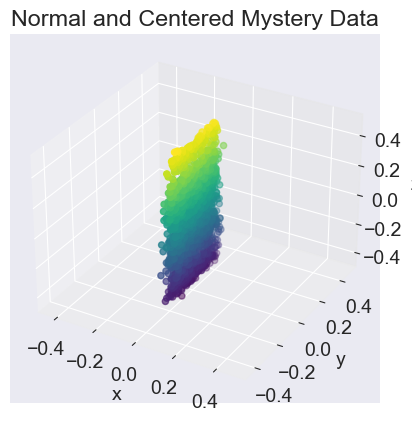

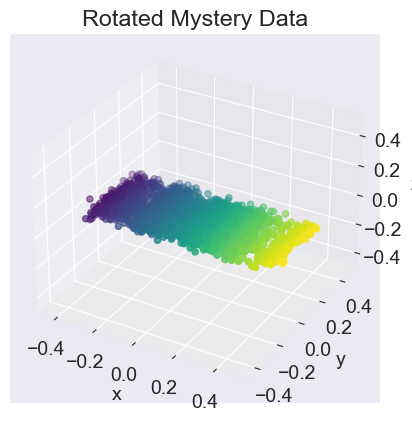

Text(0.5, 1.0, '2D Mystery Dataset')

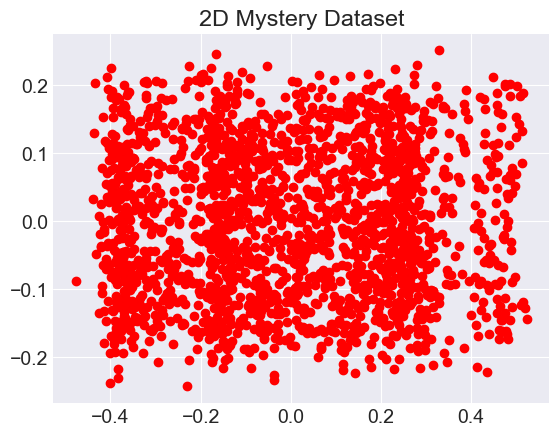

In [14]:
# plot 3d centered and normalized data
normal = normalize(data)
centered = center(normal)
min = np.min(centered)
max = np.max(centered)
limits = min, max
scatter3dplot(centered, color = data[:, -1], headers = ['x', 'y', 'z'], title = 'Normal and Centered Mystery Data', lims=limits) 

# plot 3d rotated data set
matrix = rotation_matrix_3d(90, 'y')
rotatedData = (matrix @ centered.T).T
min = np.min(rotatedData)
max = np.max(rotatedData)
limits = min, max
scatter3dplot(rotatedData, color = normal[:, -1], headers = ['x', 'y', 'z'], title = 'Rotated Mystery Data', lims = limits)

# plot 2d centered and normalized data 
x = rotatedData[:, 0]
y = rotatedData[:, 1]
plt.scatter(x, y, c = 'red')
plt.title("2D Mystery Dataset")